# MSc Thesis - Hugo Stam

### Chapter 5.3 - Operational Reliability of the waterway transport link

<img src="Figures/system_layout_alternative_2B.png" style="width:1000px">

In [1]:
# packages for data handling
import numpy as np
import pandas as pd

# packages for figures
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Pretty-print a Python object to a stream
from pprint import pprint

# Jupyter Widgets
import ipywidgets as widgets

# Scroll to specific cell
from jupyter_helpers.utilities import scroll_to_current_cell

# no warnings
import warnings
warnings.filterwarnings('ignore')

## Weather related downtime - unlimited capacity

In [2]:
# ## Weather related downtime

# %store -r PV_40_12500_1000000_downtime0
# %store -r PV_40_12500_1000000_downtime1
# %store -r PV_40_12500_1000000_downtime2
# %store -r PV_40_12500_1000000_downtime3
# %store -r PV_40_12500_1000000_downtime4

# # data
# PVs = [[0.0, PV_40_12500_1000000_downtime0],
#        [1.0, PV_40_12500_1000000_downtime1], 
#        [2.0, PV_40_12500_1000000_downtime2], 
#        [3.0, PV_40_12500_1000000_downtime3],
#        [4.0, PV_40_12500_1000000_downtime4]]

# # Create the pandas DataFrame 
# PV_df = pd.DataFrame(PVs, columns = ['Downtime', 'PV']) 
# PV_df['Downtime'] = PV_df['Downtime'].astype(float)
# display(PV_df)
# # display(PV_df.dtypes)

# plt.figure(figsize=(5,5))
# sns.lmplot(x="Downtime", y="PV", data=PV_df,
#            order=2, truncate=True, ci=None)

# # base scenario
# plt.axhline(PV_df.PV[1], linestyle='--', color='tab:grey', label='avg. utilisation rate of 0.7', zorder=0)

# # labels
# plt.title('Weather related downtime sensitivity plot', fontsize='large')
# plt.legend(frameon=False, loc='best', fontsize='large', title='Base scenario',title_fontsize='large')
# plt.text(0.15, PV_40_12500_1000000_downtime0, '15,250 TEU')
# plt.text(1.15, 3*10**9, '17,285 TEU')
# plt.text(3.15, PV_40_12500_1000000_downtime3, '32,165 TEU')
# plt.xlabel('Consecutive downtime scenarios', fontsize='large')
# plt.ylabel('PV of the costs', fontsize='large')

# # ticks
# plt.yticks(np.arange(0, 9*10**9, step = 10**9), 
#            ["$","$ 1B","$ 2B","$ 3B","$ 4B", "$ 5B", "$ 6B", "$ 7B", "$ 8B"], 
#             size='large')
# plt.xticks([0.0, 1.0, 2.0, 3.0, 4.0], 
#            ["no downtime","base","scenario 1", "scenario 2", "scenario 3"], 
#             size='large')

# # save fig
# plt.savefig("SaveFigures/sensitivity_downtime.png", bbox_inches = 'tight')

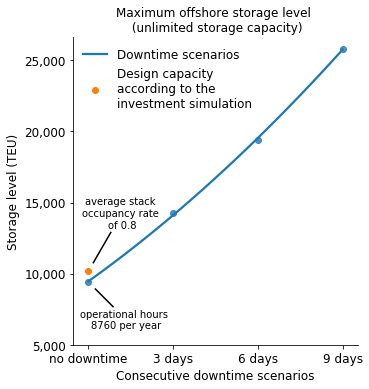

In [3]:
PVs = [[0.0, 9_420], 
       [1.0, 14_230], 
       [2.0, 19_420],
       [3.0, 25_790]]

base = [0.0, 10_160]

# Create the pandas DataFrame 
df = pd.DataFrame(PVs, columns = ['Downtime', 'Capacity']) 
df['Downtime'] = df['Downtime'].astype(float)

sns.lmplot(x="Downtime", y="Capacity", data=df, height=5, aspect=1, order=2, truncate=True, ci=None)
plt.plot(base[0], base[1], 'o', color='tab:orange', label='Investment simulation design')

# labels
plt.title('Maximum offshore storage level \n (unlimited storage capacity)', fontsize='large')
plt.text(df.Downtime[0], df.Capacity[0], 'operational hours \n8760 per year', 
         withdash=True, dashdirection=0, dashlength=25, dashrotation=135, dashpush=10) 
plt.text(base[0], base[1], 'average stack \noccupancy rate \nof 0.8',
         withdash=True, dashdirection=1, dashlength=35, dashrotation=60, dashpush=10)
plt.legend(["Downtime scenarios", "Design capacity \naccording to the \ninvestment simulation"], 
           frameon=False, loc='upper left', fontsize='large')

plt.xlabel('Consecutive downtime scenarios', fontsize='large')
plt.ylabel('Storage level (TEU)', fontsize='large')

# ticks
plt.yticks(np.arange(5_000, 30_000, step = 5_000), 
           ["5,000", "10,000", "15,000", "20,000", "25,000"], 
            size='large')
plt.xticks([0, 1, 2, 3], 
           ["no downtime", "3 days", "6 days", "9 days"], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/storage_level_unlimited.png", bbox_inches = 'tight')

## 10,000 TEU

In [4]:
%store -r annual_waiting_costs_0
%store -r annual_waiting_costs_1
%store -r annual_waiting_costs_2
%store -r annual_waiting_costs_3

run_1 = [1_587_500, 3_475_000, 25_781_250, 40_562_500]
run_2 = [2_781_250, 5_275_000, 20_237_500, 52_431_250]
run_3 = [1_400_000, 4_775_000, 11_950_000, 62_918_750]
run_4 = [annual_waiting_costs_0, annual_waiting_costs_1, annual_waiting_costs_2, annual_waiting_costs_3]

costs_df = pd.DataFrame(
    {'Run':  [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
     'Days': [0, 0, 0, 0, 3, 3, 3, 3, 6, 6, 6, 6, 9, 9, 9, 9],
     'WaitingCosts': [run_1[0], run_2[0], run_3[0], run_4[0],
                      run_1[1], run_2[1], run_3[1], run_4[1],
                      run_1[2], run_2[2], run_3[2], run_4[2],
                      run_1[3], run_2[3], run_3[3], run_4[3]]})

avg_0 = round(np.mean(costs_df.WaitingCosts[0:4]),-3)
avg_3 = round(np.mean(costs_df.WaitingCosts[4:8]),-3)
avg_6 = round(np.mean(costs_df.WaitingCosts[8:12]),-3)
avg_9 = round(np.mean(costs_df.WaitingCosts[12:16]),-3)
avg = [avg_0, avg_3, avg_6, avg_9]

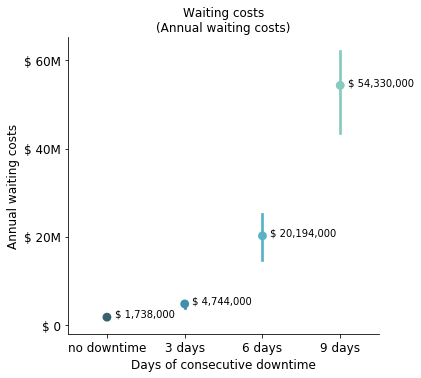

In [5]:
# plot
sns.catplot(x="Days", y="WaitingCosts", kind = "point", palette='GnBu_d', height=5, aspect=1, data=costs_df)

# annotate
for i in range(len(avg)):
     plt.text(i+.1,  avg[i], f"$ {avg[i]:,.0f}", horizontalalignment='left', size='medium', color='black')
        
# labels
plt.title('Waiting costs\n(Annual waiting costs)', fontsize='large')
plt.xlabel('Days of consecutive downtime', fontsize='large')
plt.ylabel('Annual waiting costs', fontsize='large')

# ticks
plt.yticks(np.arange(0, 8*10**7, step = 2 * 10**7), 
           ["$ 0","$ 20M", "$ 40M", "$ 60M","$ 80M"], 
            size='large')
plt.xticks([0, 1, 2, 3], 
           ["no downtime","3 days","6 days", "9 days"], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/waiting_costs_annual_catplot.png", bbox_inches = 'tight')

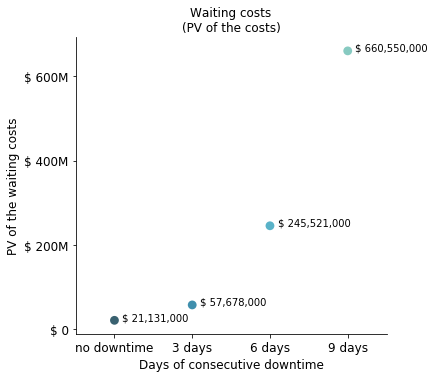

In [6]:
r = 0.06
n = 20

PVs = [round(np.npv(r, [avg_0] * n),-3), 
       round(np.npv(r, [avg_3] * n),-3), 
       round(np.npv(r, [avg_6] * n),-3),
       round(np.npv(r, [avg_9] * n),-3)]

PV_df = pd.DataFrame({'Days': [0, 3, 6, 9], 'PV': [PVs[0], PVs[1], PVs[2], PVs[3]]})

# plot
sns.catplot(x="Days", y="PV", kind = "point", palette='GnBu_d', height=5, aspect=1, data=PV_df)

# annotate
for i in range(len(avg)):
     plt.text(i+.1,  PV_df.PV[i], f"$ {PV_df.PV[i]:,.0f}", horizontalalignment='left', size='medium', color='black')
        
# labels
plt.title('Waiting costs\n(PV of the costs)', fontsize='large')
plt.xlabel('Days of consecutive downtime', fontsize='large')
plt.ylabel('PV of the waiting costs', fontsize='large')

# ticks
plt.yticks(np.arange(0, 8*10**8, step = 2 * 10**8), 
           ["$ 0","$ 200M", "$ 400M", "$ 600M"], 
            size='large')
plt.xticks([0, 1, 2, 3], 
           ["no downtime","3 days","6 days", "9 days"], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/waiting_costs_PV_catplot.png", bbox_inches = 'tight')

In [7]:
# %store -r annual_waiting_costs_12500_0
# %store -r annual_waiting_costs_12500_1
# %store -r annual_waiting_costs_12500_2
# %store -r annual_waiting_costs_12500_3
# print(annual_waiting_costs_12500_0, annual_waiting_costs_12500_1, annual_waiting_costs_12500_2, annual_waiting_costs_12500_3)

In [8]:
# run_1 = [2_231_250, 6_256_250, 30_006_250, 38_381_250]  # check for onshore 12,500
# run_2 = [1_568_750, 7_806_250, 27_080_250, 40_518_750]
# run_3 = [0,0,0,0]

# df = pd.DataFrame(
#     {'Run':  [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
#      'Days': [0, 0, 0, 3, 3, 3, 6, 6, 6, 9, 9, 9],
#      'WaitingCosts': [run_1[0], run_2[0], run_3[0],
#                       run_1[1], run_2[1], run_3[1],
#                       run_1[2], run_2[2], run_3[2],
#                       run_1[3], run_2[3], run_3[3]]})

# avg_0 = round(np.mean(df.WaitingCosts[0:3]),-3)
# avg_3 = round(np.mean(df.WaitingCosts[3:6]),-3)
# avg_6 = round(np.mean(df.WaitingCosts[6:9]),-3)
# avg_9 = round(np.mean(df.WaitingCosts[9:12]),-3)
# avg = [avg_0, avg_3, avg_6, avg_9]

In [9]:
# # plot
# sns.catplot(x="Days", y="WaitingCosts", kind = "point", palette='GnBu_d', height=5, aspect=1, data=df)

# # annotate
# for i in range(len(avg)):
#      plt.text(i+.1,  avg[i], f"$ {avg[i]:,.0f}", horizontalalignment='left', size='medium', color='black')
        
# # labels
# plt.title('Waiting time costs (Capacity: 12,500 TEU)', fontsize='large')
# plt.xlabel('Days of consecutive downtime', fontsize='large')
# plt.ylabel('Annual waiting costs', fontsize='large')


# # ticks
# plt.yticks(np.arange(0, 8*10**7, step = 2 * 10**7), 
#            ["$ 0","$ 20M", "$ 40M", "$ 60M","$ 80M"], 
#             size='large')
# plt.xticks([0, 1, 2, 3], 
#            ["no downtime","3 days","6 days", "9 days"], 
#             size='large')

# # save fig
# plt.savefig("SaveFigures/sensitivity_waiting_costs_catplot_12500.png", bbox_inches = 'tight')

In [10]:
# %store -r annual_waiting_costs_15000_0
# %store -r annual_waiting_costs_15000_1
# %store -r annual_waiting_costs_15000_2
# %store -r annual_waiting_costs_15000_3

In [11]:
# run_1 = [1_736_000, 4_300_000, 28_868_750, 55_631_250] 
# run_2 = [0, 0, 0, 0]
# run_3 = [annual_waiting_costs_15000_0, 0, annual_waiting_costs_15000_2, annual_waiting_costs_15000_3]

# df = pd.DataFrame(
#     {'Run':  [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
#      'Days': [0, 0, 0, 3, 3, 3, 6, 6, 6, 9, 9, 9],
#      'WaitingCosts': [run_1[0], run_2[0], run_3[0],
#                       run_1[1], run_2[1], run_3[1],
#                       run_1[2], run_2[2], run_3[2],
#                       run_1[3], run_2[3], run_3[3]]})

# avg_0 = round(np.mean(df.WaitingCosts[0:3]),-3)
# avg_3 = round(np.mean(df.WaitingCosts[3:6]),-3)
# avg_6 = round(np.mean(df.WaitingCosts[6:9]),-3)
# avg_9 = round(np.mean(df.WaitingCosts[9:12]),-3)
# avg = [avg_0, avg_3, avg_6, avg_9]

In [12]:
# # plot
# sns.catplot(x="Days", y="WaitingCosts", kind = "point", palette='GnBu_d', height=5, aspect=1, data=df)

# # annotate
# for i in range(len(avg)):
#      plt.text(i+.1,  avg[i], f"$ {avg[i]:,.0f}", horizontalalignment='left', size='medium', color='black')
        
# # labels
# plt.title('Waiting time costs (Capacity: 12,500 TEU)', fontsize='large')
# plt.xlabel('Days of consecutive downtime', fontsize='large')
# plt.ylabel('Annual waiting costs', fontsize='large')


# # ticks
# plt.yticks(np.arange(0, 8*10**7, step = 2 * 10**7), 
#            ["$ 0","$ 20M", "$ 40M", "$ 60M","$ 80M"], 
#             size='large')
# plt.xticks([0, 1, 2, 3], 
#            ["no downtime","3 days","6 days", "9 days"], 
#             size='large')

# # save fig
# plt.savefig("SaveFigures/sensitivity_waiting_costs_catplot_12500.png", bbox_inches = 'tight')

In [13]:
# %store -r annual_waiting_costs_10000_0
# %store -r annual_waiting_costs_10000_1
# %store -r annual_waiting_costs_10000_2
# %store -r annual_waiting_costs_10000_3

## Total (Check Excel for run log)

In [14]:
avg_annual_waiting_costs_10000_0 =  1_738_000
avg_annual_waiting_costs_10000_1 =  4_744_000
avg_annual_waiting_costs_10000_2 = 20_194_000
avg_annual_waiting_costs_10000_3 = 54_330_000
avg_annual_waiting_costs_12500_0 =  1_742_000
avg_annual_waiting_costs_12500_1 =  2_580_000
avg_annual_waiting_costs_12500_2 = 12_150_000
avg_annual_waiting_costs_12500_3 = 37_875_000
avg_annual_waiting_costs_15000_0 =  1_736_000
avg_annual_waiting_costs_15000_1 =  1_746_000
avg_annual_waiting_costs_15000_2 =  6_250_000
avg_annual_waiting_costs_15000_3 = 26_756_000
avg_annual_waiting_costs_17500_0 =  1_740_000
avg_annual_waiting_costs_17500_1 =  1_742_000
avg_annual_waiting_costs_17500_2 =  3_005_000
avg_annual_waiting_costs_17500_3 = 15_753_000
avg_annual_waiting_costs_20000_0 =  1_738_000
avg_annual_waiting_costs_20000_1 =  1_740_000
avg_annual_waiting_costs_20000_2 =  1_742_000
avg_annual_waiting_costs_20000_3 =  7_651_000

avg_costs = [[0, 10_000, avg_annual_waiting_costs_10000_0],
             [1, 10_000, avg_annual_waiting_costs_10000_1],
             [2, 10_000, avg_annual_waiting_costs_10000_2],
             [3, 10_000, avg_annual_waiting_costs_10000_3],
             [0, 12_500, avg_annual_waiting_costs_12500_0],
             [1, 12_500, avg_annual_waiting_costs_12500_1],
             [2, 12_500, avg_annual_waiting_costs_12500_2],
             [3, 12_500, avg_annual_waiting_costs_12500_3],
             [0, 15_000, avg_annual_waiting_costs_15000_0],
             [1, 15_000, avg_annual_waiting_costs_15000_1],
             [2, 15_000, avg_annual_waiting_costs_15000_2],
             [3, 15_000, avg_annual_waiting_costs_15000_3],
             [0, 17_500, avg_annual_waiting_costs_17500_0],
             [1, 17_500, avg_annual_waiting_costs_17500_1],
             [2, 17_500, avg_annual_waiting_costs_17500_2],
             [3, 17_500, avg_annual_waiting_costs_17500_3],
             [0, 20_000, avg_annual_waiting_costs_20000_0],
             [1, 20_000, avg_annual_waiting_costs_20000_1],
             [2, 20_000, avg_annual_waiting_costs_20000_2],
             [3, 20_000, avg_annual_waiting_costs_20000_3]]

,Scenario,Capacity,PV
0,0,10000.0,1738000
1,1,10000.0,4744000
2,2,10000.0,20194000
3,3,10000.0,54330000
4,0,12500.0,1742000
5,1,12500.0,2580000
6,2,12500.0,12150000
7,3,12500.0,37875000
8,0,15000.0,1736000
9,1,15000.0,1746000


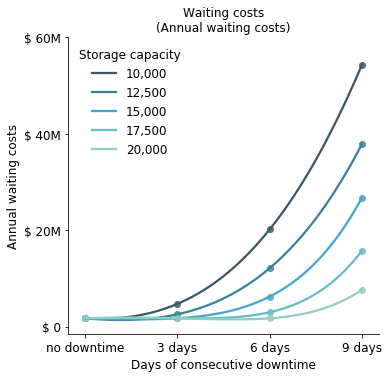

In [15]:
# Create the pandas DataFrame 
cost_df = pd.DataFrame(avg_costs, columns = ['Scenario', 'Capacity', 'PV']) 
cost_df['Capacity'] = cost_df['Capacity'].astype(float)
display(cost_df)

# plot
sns.lmplot(x="Scenario", y="PV", data=cost_df, legend=False, order=5, truncate=True, 
           palette="GnBu_d", hue="Capacity", height=5, aspect=1, ci=None)

# labels
plt.title('Waiting costs\n(Annual waiting costs)', fontsize='large')
plt.xlabel('Days of consecutive downtime', fontsize='large')
plt.ylabel('Annual waiting costs', fontsize='large')
plt.legend(["10,000", "12,500", "15,000", "17,500", "20,000"], loc='upper left',
           frameon=False, fontsize='large', title='Storage capacity', title_fontsize='large')

# ticks
plt.yticks(np.arange(0, 8*10**7, step = 2 * 10**7), 
           ["$ 0","$ 20M", "$ 40M", "$ 60M"], 
            size='large')
plt.xticks([0, 1, 2, 3], 
           ['no downtime', '3 days', '6 days', '9 days'], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/waiting_costs_annual_scenarios.png", bbox_inches = 'tight')

In [16]:
berth_1 = 1_738_000
berth_2 = 1_742_000
berth_3 = 1_736_000
berth_4 = 1_740_000
berth_5 = 1_738_000

avg_costs = [[0, 10_000, avg_annual_waiting_costs_10000_0 - berth_1],
             [1, 10_000, avg_annual_waiting_costs_10000_1 - berth_1],
             [2, 10_000, avg_annual_waiting_costs_10000_2 - berth_1],
             [3, 10_000, avg_annual_waiting_costs_10000_3 - berth_1],
             [0, 12_500, avg_annual_waiting_costs_12500_0 - berth_2],
             [1, 12_500, avg_annual_waiting_costs_12500_1 - berth_2],
             [2, 12_500, avg_annual_waiting_costs_12500_2 - berth_2],
             [3, 12_500, avg_annual_waiting_costs_12500_3 - berth_2],
             [0, 15_000, avg_annual_waiting_costs_15000_0 - berth_3],
             [1, 15_000, avg_annual_waiting_costs_15000_1 - berth_3],
             [2, 15_000, avg_annual_waiting_costs_15000_2 - berth_3],
             [3, 15_000, avg_annual_waiting_costs_15000_3 - berth_3],
             [0, 17_500, avg_annual_waiting_costs_17500_0 - berth_4],
             [1, 17_500, avg_annual_waiting_costs_17500_1 - berth_4],
             [2, 17_500, avg_annual_waiting_costs_17500_2 - berth_4],
             [3, 17_500, avg_annual_waiting_costs_17500_3 - berth_4],
             [0, 20_000, avg_annual_waiting_costs_20000_0 - berth_5],
             [1, 20_000, avg_annual_waiting_costs_20000_1 - berth_5],
             [2, 20_000, avg_annual_waiting_costs_20000_2 - berth_5],
             [3, 20_000, avg_annual_waiting_costs_20000_3 - berth_5]]

# Create the pandas DataFrame 
cost_df = pd.DataFrame(avg_costs, columns = ['Scenario', 'Capacity', 'PV']) 
cost_df['Capacity'] = cost_df['Capacity'].astype(float)

,Scenario,Capacity,PV
0,0,10000.0,0
1,1,10000.0,3006000
2,2,10000.0,18456000
3,3,10000.0,52592000
4,0,12500.0,0
5,1,12500.0,838000
6,2,12500.0,10408000
7,3,12500.0,36133000
8,0,15000.0,0
9,1,15000.0,10000


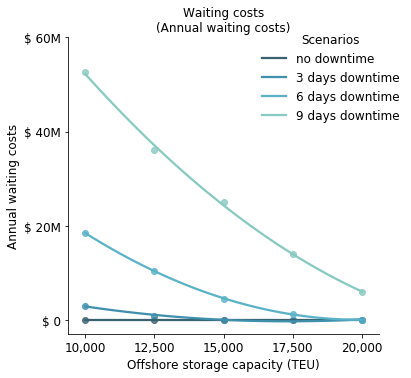

In [17]:
display(cost_df)

# plot
sns.lmplot(x="Capacity", y="PV", data=cost_df, legend=False, order=2, truncate=True, 
           palette="GnBu_d", hue="Scenario", height=5, aspect=1, ci=None)

# labels
plt.title('Waiting costs\n(Annual waiting costs)', fontsize='large')
plt.xlabel('Offshore storage capacity (TEU)', fontsize='large')
plt.ylabel('Annual waiting costs', fontsize='large')
plt.legend(['no downtime', '3 days downtime', '6 days downtime', '9 days downtime'], bbox_to_anchor=(1.1, 1.05),
           frameon=False, fontsize='large', title='Scenarios', title_fontsize='large')

# ticks
plt.yticks(np.arange(0, 8*10**7, step = 2 * 10**7), 
           ["$ 0","$ 20M", "$ 40M", "$ 60M"], 
            size='large')
plt.xticks([10_000, 12_500, 15_000, 17_500, 20_000], 
           ["10,000","12,500","15,000", "17,500", "20,000"], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/waiting_costs_annual_capacities.png", bbox_inches = 'tight')

In [18]:
PVs = [[0, 10_000, max(0, np.npv(r, [avg_annual_waiting_costs_10000_0 - berth_1] * n))],
       [1, 10_000, max(0, np.npv(r, [avg_annual_waiting_costs_10000_1 - berth_1] * n))],
       [2, 10_000, max(0, np.npv(r, [avg_annual_waiting_costs_10000_2 - berth_1] * n))],
       [3, 10_000, max(0, np.npv(r, [avg_annual_waiting_costs_10000_3 - berth_1] * n))],
       [0, 12_500, max(0, np.npv(r, [avg_annual_waiting_costs_12500_0 - berth_2] * n))],
       [1, 12_500, max(0, np.npv(r, [avg_annual_waiting_costs_12500_1 - berth_2] * n))],
       [2, 12_500, max(0, np.npv(r, [avg_annual_waiting_costs_12500_2 - berth_2] * n))],
       [3, 12_500, max(0, np.npv(r, [avg_annual_waiting_costs_12500_3 - berth_2] * n))],
       [0, 15_000, max(0, np.npv(r, [avg_annual_waiting_costs_15000_0 - berth_3] * n))],
       [1, 15_000, max(0, np.npv(r, [avg_annual_waiting_costs_15000_1 - berth_3] * n))],
       [2, 15_000, max(0, np.npv(r, [avg_annual_waiting_costs_15000_2 - berth_3] * n))],
       [3, 15_000, max(0, np.npv(r, [avg_annual_waiting_costs_15000_3 - berth_3] * n))],
       [0, 17_500, max(0, np.npv(r, [avg_annual_waiting_costs_17500_0 - berth_4] * n))],
       [1, 17_500, max(0, np.npv(r, [avg_annual_waiting_costs_17500_1 - berth_4] * n))],
       [2, 17_500, max(0, np.npv(r, [avg_annual_waiting_costs_17500_2 - berth_4] * n))],
       [3, 17_500, max(0, np.npv(r, [avg_annual_waiting_costs_17500_3 - berth_4] * n))],
       [0, 20_000, max(0, np.npv(r, [avg_annual_waiting_costs_20000_0 - berth_5] * n))],
       [1, 20_000, max(0, np.npv(r, [avg_annual_waiting_costs_20000_1 - berth_5] * n))],
       [2, 20_000, max(0, np.npv(r, [avg_annual_waiting_costs_20000_2 - berth_5] * n))],
       [3, 20_000, max(0, np.npv(r, [avg_annual_waiting_costs_20000_3 - berth_5] * n))]]

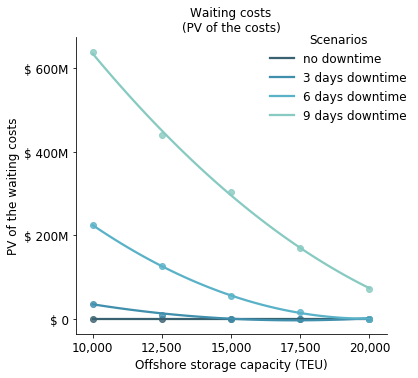

In [19]:
# Create the pandas DataFrame 
PV_df = pd.DataFrame(PVs, columns = ['Scenario', 'Capacity', 'PV']) 
PV_df['Capacity'] = PV_df['Capacity'].astype(float)
# display(PV_df)

# plot
sns.lmplot(x="Capacity", y="PV", data=PV_df, legend=False, order=2, truncate=True, 
           palette="GnBu_d", hue="Scenario", height=5, aspect=1, ci=None)

# labels
plt.title('Waiting costs\n(PV of the costs)', fontsize='large')
plt.xlabel('Offshore storage capacity (TEU)', fontsize='large')
plt.ylabel('PV of the waiting costs', fontsize='large')
plt.legend(['no downtime', '3 days downtime', '6 days downtime', '9 days downtime'], bbox_to_anchor=(1.1, 1.05),
           frameon=False, fontsize='large', title='Scenarios', title_fontsize='large')

# ticks
plt.yticks(np.arange(0, 8*10**8, step = 2 * 10**8), 
           ["$ 0","$ 200M", "$ 400M", "$ 600M"], 
            size='large')
plt.xticks([10_000, 12_500, 15_000, 17_500, 20_000], 
           ["10,000","12,500","15,000", "17,500", "20,000"], 
            size='large')

plt.savefig("SaveFigures/Logistics/waiting_costs_PV_capacities.png", bbox_inches = 'tight')

## Weather related downtime - max. capacity

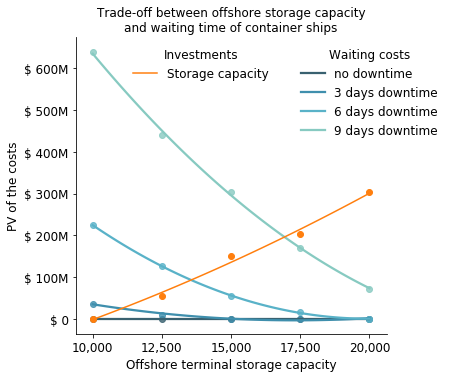

In [20]:
# plot
sns.lmplot(x="Capacity", y="PV", data=PV_df, legend=False, order=2, truncate=True, 
           palette="GnBu_d", hue="Scenario", height=5, aspect=1, ci=None)

# storage expansion
x = np.array([10_000, 12_500, 15_000, 17_500, 20_000])
y = np.array([0, 55_398_000, 150_428_000, 203_085_000, 304_186_000])
coefficients = np.polyfit(x, y, 2)
poly = np.poly1d(coefficients)
new_x = np.linspace(x[0], x[-1])
new_y = poly(new_x)
expansion_1, expansion_2 = plt.plot(x, y, "o", new_x, new_y, color='tab:orange', label='Storage capacity')

first_leg = plt.legend(handles=(expansion_2,), loc='upper', bbox_to_anchor=(0.15, 1.0),
                       frameon=False, fontsize='large', title='Investments', title_fontsize='large')
add_first_leg = plt.gca().add_artist(first_leg)

# labels
plt.title('Trade-off between offshore storage capacity\nand waiting time of container ships', fontsize='large')
plt.xlabel('Offshore terminal storage capacity', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(['no downtime', '3 days downtime', '6 days downtime', '9 days downtime'], bbox_to_anchor=(1.2, 1.0),
           frameon=False, fontsize='large', title='Waiting costs', title_fontsize='large')

# ticks
plt.yticks(np.arange(0, 7*10**8, step = 1 * 10**8), 
           ["$ 0","$ 100M", "$ 200M", "$ 300M", "$ 400M", "$ 500M", "$ 600M"], 
            size='large')
plt.xticks([10_000, 12_500, 15_000, 17_500, 20_000], 
           ["10,000","12,500","15,000", "17,500", "20,000"], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/waiting_costs_PV_expansion.png", bbox_inches = 'tight')
# plt.savefig("SaveFigures/Logistics/waiting_costs_PV_expansion_b.png", bbox_inches = 'tight')

,Scenario,Capacity,PV
0,2,10000.0,2.243902e+08
1,2,12500.0,1.265417e+08
2,2,15000.0,5.488174e+07
3,2,17500.0,1.538002e+07
4,2,20000.0,4.863247e+04
0,0,10000.0,2.243902e+08
1,0,12500.0,1.819397e+08
2,0,15000.0,2.053097e+08
3,0,17500.0,2.184650e+08
4,0,20000.0,3.042346e+08


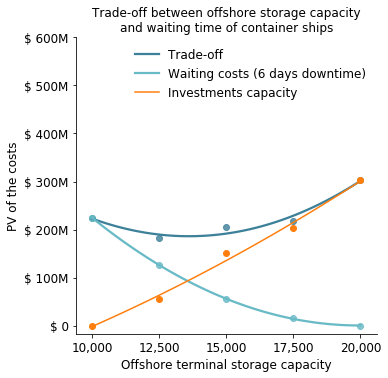

In [21]:
# Edit the DataFrame 
PVs_ = [[2, 10_000, max(0, np.npv(r, [avg_annual_waiting_costs_10000_2 - berth_1] * n))],
       [2, 12_500, max(0, np.npv(r, [avg_annual_waiting_costs_12500_2 - berth_2] * n))],
       [2, 15_000, max(0, np.npv(r, [avg_annual_waiting_costs_15000_2 - berth_3] * n))],
       [2, 17_500, max(0, np.npv(r, [avg_annual_waiting_costs_17500_2 - berth_4] * n))],
       [2, 20_000, max(0, np.npv(r, [avg_annual_waiting_costs_20000_2 - berth_5] * n))]]

PV_df_ = pd.DataFrame(PVs_, columns = ['Scenario', 'Capacity', 'PV']) 
PV_df_['Capacity'] = PV_df_['Capacity'].astype(float)

# trade-off
y1 = list(PV_df_.PV)
y2 = y1 + y
trade_off = [[0, 10_000, y2[0]], [0, 12_500, y2[1]], [0, 15_000, y2[2]], [0, 17_500, y2[3]], [0, 20_000, y2[4]]]
trade_off_df = pd.DataFrame(trade_off, columns = ['Scenario','Capacity', 'PV']) 
trade_off_df['Capacity'] = trade_off_df['Capacity'].astype(float)

df = pd.concat([PV_df_, trade_off_df])
display(df)

# plot
sns.lmplot(x="Capacity", y="PV", data=df, legend=False, order=2, truncate=True, 
           palette="GnBu_d", hue="Scenario", height=5, aspect=1, ci=None)

# storage expansion
x = np.array([10_000, 12_500, 15_000, 17_500, 20_000])
y = np.array([0, 55_398_000, 150_428_000, 203_085_000, 304_186_000])
coefficients = np.polyfit(x, y, 2)
poly = np.poly1d(coefficients)
new_x = np.linspace(x[0], x[-1])
new_y = poly(new_x)
expansion_2 = plt.plot(new_x, new_y, color='tab:orange', label='Storage capacity')

expansion_1 = plt.plot(x, y, 'o', color='tab:orange', label=None)

# labels
plt.title('Trade-off between offshore storage capacity\nand waiting time of container ships', fontsize='large')
plt.xlabel('Offshore terminal storage capacity', fontsize='large')
plt.ylabel('PV of the costs', fontsize='large')
plt.legend(['Trade-off','Waiting costs (6 days downtime)', "Investments capacity"], bbox_to_anchor=(0.0, 1.0, 1, 0),
           frameon=False, fontsize='large')

# ticks
plt.yticks(np.arange(0, 7*10**8, step = 1 * 10**8), 
           ["$ 0","$ 100M", "$ 200M", "$ 300M", "$ 400M", "$ 500M", "$ 600M"], 
            size='large')
plt.xticks([10_000, 12_500, 15_000, 17_500, 20_000], 
           ["10,000","12,500","15,000", "17,500", "20,000"], 
            size='large')

# save fig
plt.savefig("SaveFigures/Logistics/waiting_costs_PV_expansion_2.png", bbox_inches = 'tight')
# plt.savefig("SaveFigures/Logistics/waiting_costs_PV_expansion_2b.png", bbox_inches = 'tight')